# Running on 'Cheyenne' (Example!)

This is a very quick introduction to running the climate model CESM. It will guide you through the basics of running CESM. <br>
Today, we will run a simulation. Later, we will look at the data you produced. 

*** 

## 1. Creating a CESM case

CESM experiments start with creating a **case** with a specific configuration of CESM (**compset**) and at a particular **resolution**. 

For instance, here is the command to create a CESM case called **case0** with <br>
<ul>
    <li>compset:    B1850</li>
    <li>resolution: f09_g17</li>
</ul>

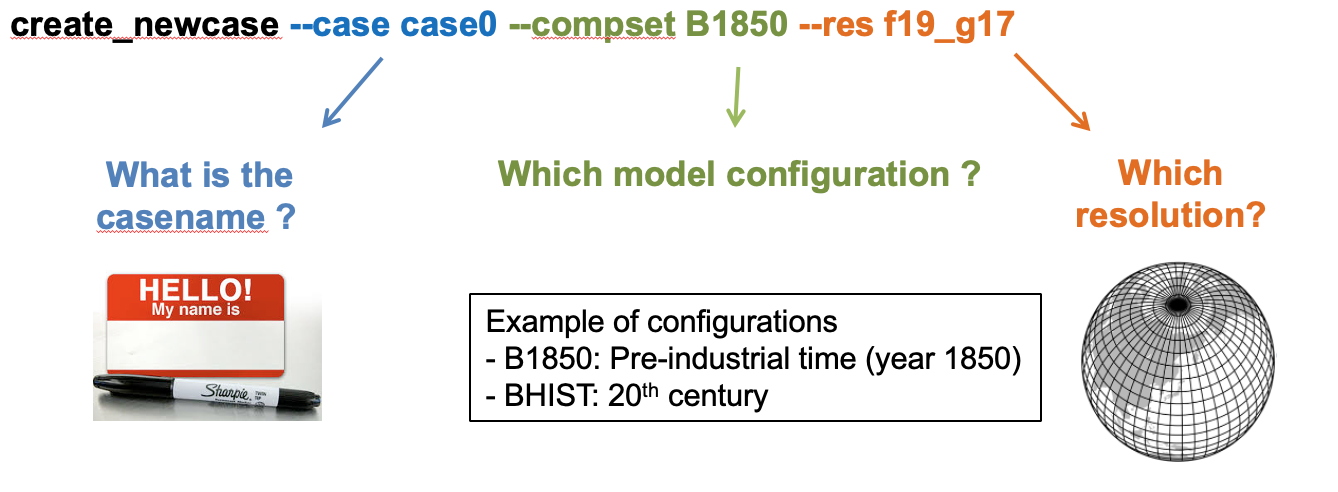

### Exercise 1

Customize your casename (try picking a **different** case number than 'case0') and run the cell to issue the command.

<div class="alert alert-warning">
   
<details>   
   <summary>
        <img src="https://freesvg.org/img/bulb_on.png" width="20px">
       <font face="Times New Roman" color='blue' size="4">Hint!</font>
    </summary>
    
A full command is given in the example above - but you can change the case to 'case03', for example, by using the option "--case case03"</details>
</div>

In [ ]:
# Enter your command here


<div class="alert alert-success">
   
<details>   
   <summary>
        <img src="https://freesvg.org/img/help-browser.png" width="20px">
       <font face="Times New Roman" color='blue' size="4">Click here for a solution to Exercise #1</font>
    </summary>
You can try the following command to create a case with the name 'case0':  
<br><br>
`create_newcase --case case0 --compset B1850 --res f19_g17 `
</details>
</div>


Great!  You've created the default version of your case. Let's wait for everyone before going to step 2.
<br><br>

***

<h2> 2. Setting up the case</h2>

The next step in running CESM is to **setup** the case. This is done by going into the case you just created and running `./case.setup`.   

The command `./case.setup` sets up files that control the model's behavior.  


### Exercise 2

Customize the cell below with your own case name. Then run the cell. This sets up the case. 

In [ ]:
cd case0
./case.setup

<br>Great!  You've now used the `case.setup` command to set up your case.  Let's wait for everyone before going to step 3.<br><br>

***

## 3. Compiling the case

CESM is written in a language called **Fortran**. Similar to English, Fortran is human readable. The computer doesn't understand Fortran. It needs to be translated in a computer-readable code (strings of 0s and 1s).   

Here is an example of fortran code

### Exercise 3 

Run the cell below. This compiles the case. Be aware that this can take a few minutes.

In [ ]:
qcmd -- ./case.build 

<br><br>
Again, this will take a few minutes.  You'll know this is complete when you see the line:

>&nbsp;MODEL BUILD HAS FINISHED SUCCESSFULLY

If you see that, fantastic!  You've built your first CESM case!  Let's wait for everyone before going to step 4.<br><br>


***

## 4. Customizing a CESM case

**Adding some butterfly effect** 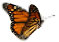
- If we submitted the simulation now, we would all get the same results.
- Let’s add a small perturbation to the temperature (butterfly effect) 
<br>

**Example of a small perturbation** 

### Exercise 4 

Run the cell below. This adds some butterfly effect (a small T temperature). <br>
Each student adds a different butterfly effect. 

In [ ]:
echo "pertlim = 0e-13" >> user_nl_cam

<br>
Let's wait for everyone before going to step 5.<br><br>

***

## 5. Set the length of the run 

By default, cesm is set to produce 5-day simulations. Here, we modify the case to do a one-month simulation.
<br>

### Exercise 5

Run the following cell to change the length of the simulation to one month. 

In [ ]:
./xmlchange STOP_OPTION=nmonths,STOP_N=1

Run the following cell to check the length of the simulation was properly set

In [ ]:
./xmlquery STOP_OPTION,STOP_N

<br><br> If you see: 
> STOP_OPTION: nmonths <br>
> STOP_N: 1 <br>

Great!  You have set the case to run the model for one month.  Let's wait for everyone before going to step 6. 
<br><br>

***

## 6. Running your case

Running a case is also simple - we just issue the `case.submit` command.  This will start by checking that we have all of the necessary input data for our run, and downloading whatever is missing, and then it will perform the actual simulation - which we've configured to run for one month.


### Exercise 6

Submit your simulation. Run the cell below.  

In [ ]:
./case.submit

**Check the simulation is running** 

When you submit a simulation, it will be waiting in the computer until there is enough computer resources. <br> The command `squeue` allows you to make sure your simulation is in the queue or running.

In [ ]:
squeue -u $USER

<br><br> If your simulation is running, you should see something like: 

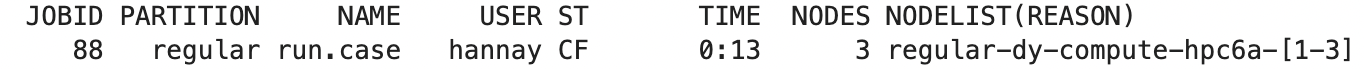
                
***

Well done. You are now running your first CESM simulation. We will look at the results of your simulation tomorrow. 